Transmission of Pulse Code Modulation (PCM) output waveform using Time Division
Multiplexing (TDM) with and without additive noise.

In [319]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
pi = np.pi

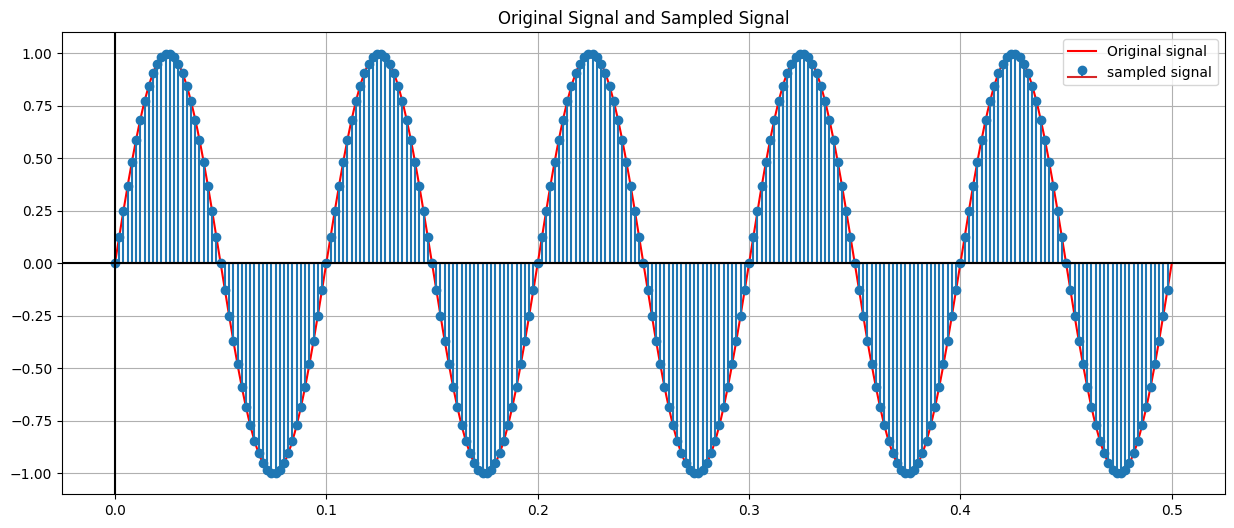

In [320]:
#Sinusoidal Signal

Amp = 1 #Amplitude for the sinusoidal signal
Fm = 10 #Message Frequency
cycles = 5
t_org = np.linspace(0, cycles / Fm, 1000) #plottin points for the original signal
X_org = np.sin(2 * pi * Fm * t_org) #Original Signal
fs = 500 #Sampling frequency
ts = 1 / fs #Sampling period
t = np.arange(0, 5 * cycles * Fm *ts, ts) #plotting points for the sampled signal
X = np.sin(2 * pi * Fm * t)#Sampled Signal

plt.figure(figsize=(15,6))
plt.plot(t_org,X_org, color = 'red') #Plotting of the original signal
plt.stem(t,X) #Plotting of sampling signal
plt.title('Original Signal and Sampled Signal')
plt.legend(['Original signal', 'sampled signal'], loc = 'upper right')
plt.axhline(y = 0, color = 'black')
plt.axvline(x = 0, color = 'black')
plt.grid(True)
plt.show()

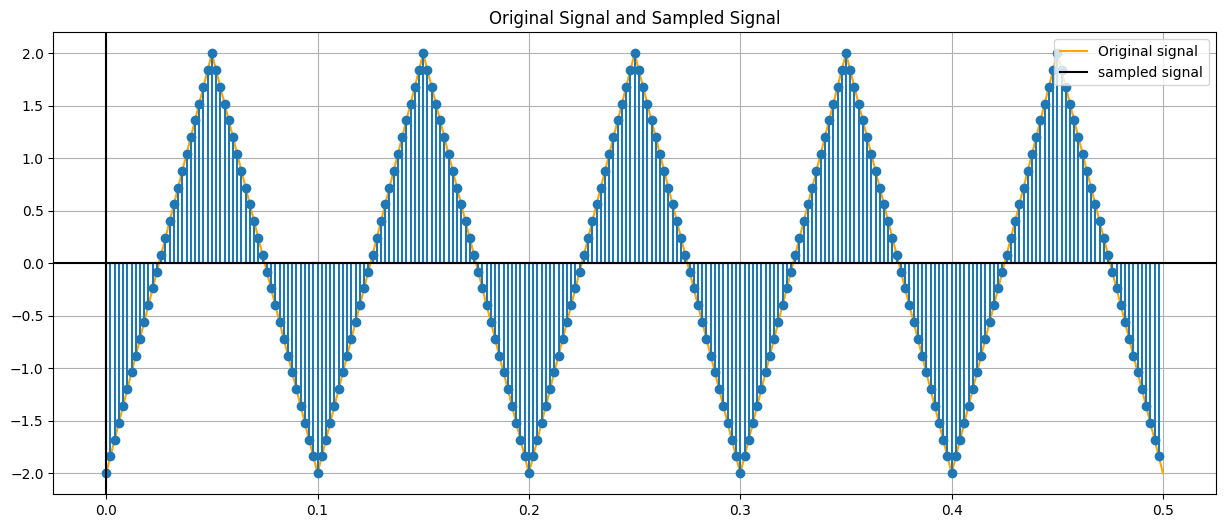

In [321]:
# Triangular signal
Amp2 = 2
Xt_org = Amp2 * signal.sawtooth(2 * pi * Fm * t_org, width=0.5 )
Xt_sam = Amp2 * signal.sawtooth(2 * pi * Fm * t, width= 0.5)
plt.figure(figsize = (15 ,6))
plt.plot(t_org,Xt_org, color = 'orange')
plt.stem(t, Xt_sam)
plt.title('Original Signal and Sampled Signal')
plt.axhline( y = 0, color = 'black')
plt.axvline( x = 0, color = 'black')
plt.legend(['Original signal', 'sampled signal'], loc = 'upper right')
plt.grid(True)
plt.show()

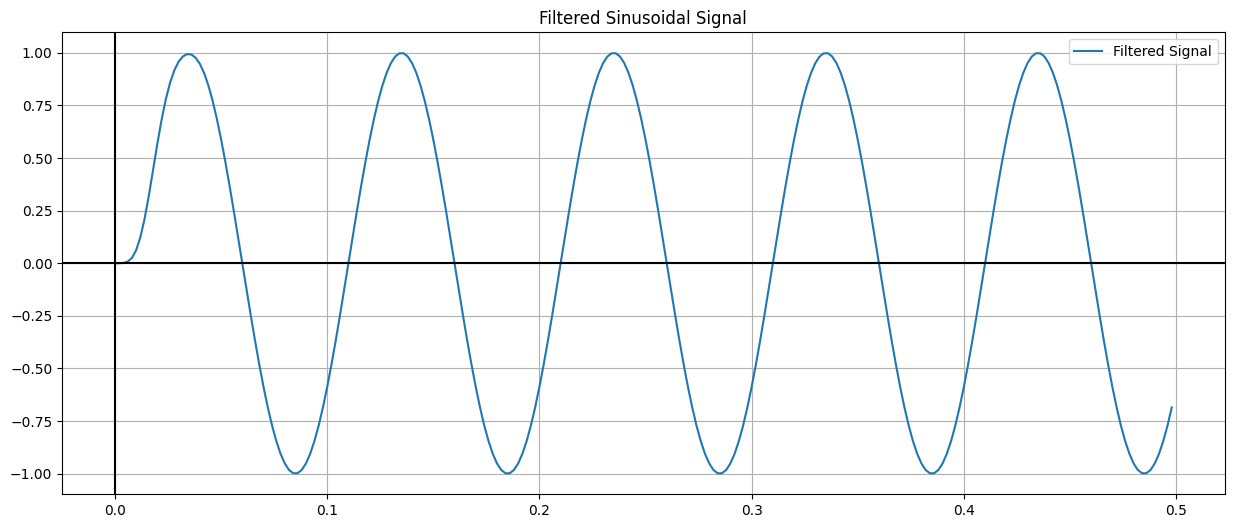

In [322]:
#Designing an Anti-aliasing filter

Fc = fs             # Cutoff frequency of the Anti-aliasing filter
Filter_order = 5   # Order of the filter
fsam = 5000        # Sampling frequency for the filter

NY_freq = 0.5 * fsam
normalized_cutoff_freq = Fc / NY_freq #Normalised Frequency
b, a = signal.butter(Filter_order, normalized_cutoff_freq, btype='low', analog=False)  #Parameters for butter worth filter
X_filtered = signal.lfilter(b, a, X) #Filtered Sinusoidal Signal
plt.figure(figsize = (15,6))
plt.plot(t, X_filtered) #Plotting of filtered Sinusoidal Signal
plt.title('Filtered Sinusoidal Signal')
plt.legend(['Filtered Signal'])
plt.axhline( y = 0, color = 'black')
plt.axvline( x = 0, color = 'black')
plt.grid(True)

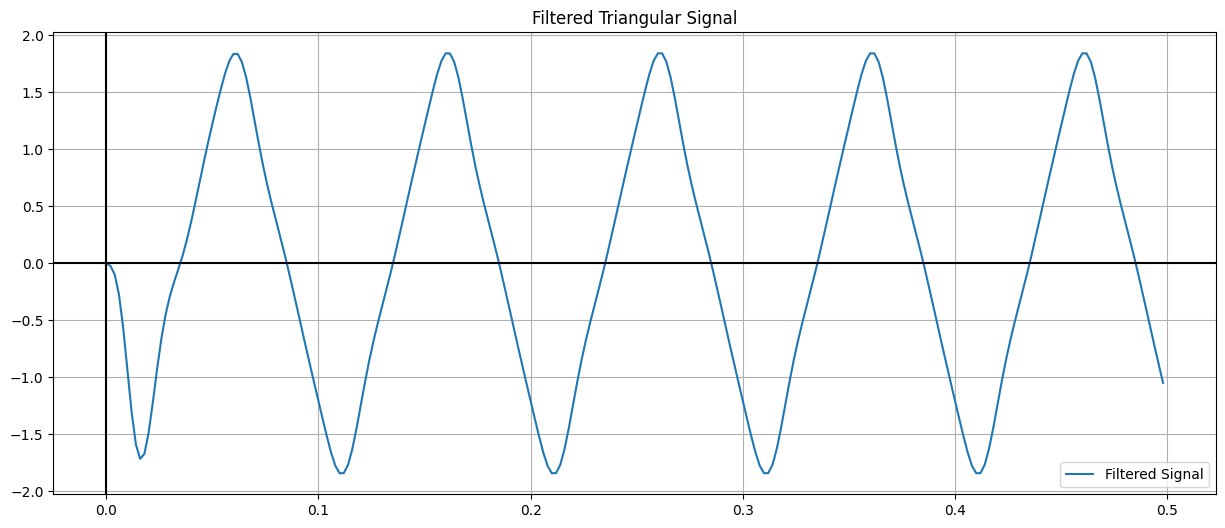

In [323]:
Xt_filtered = signal.lfilter(b, a, Xt_sam) #Filtered Triangular SIgnal
plt.figure(figsize = (15,6))
plt.plot(t, Xt_filtered) #Plotting of filtered Sinusoidal Signal
plt.title('Filtered Triangular Signal')
plt.legend(['Filtered Signal'])
plt.axhline( y = 0, color = 'black')
plt.axvline( x = 0, color = 'black')
plt.grid(True)

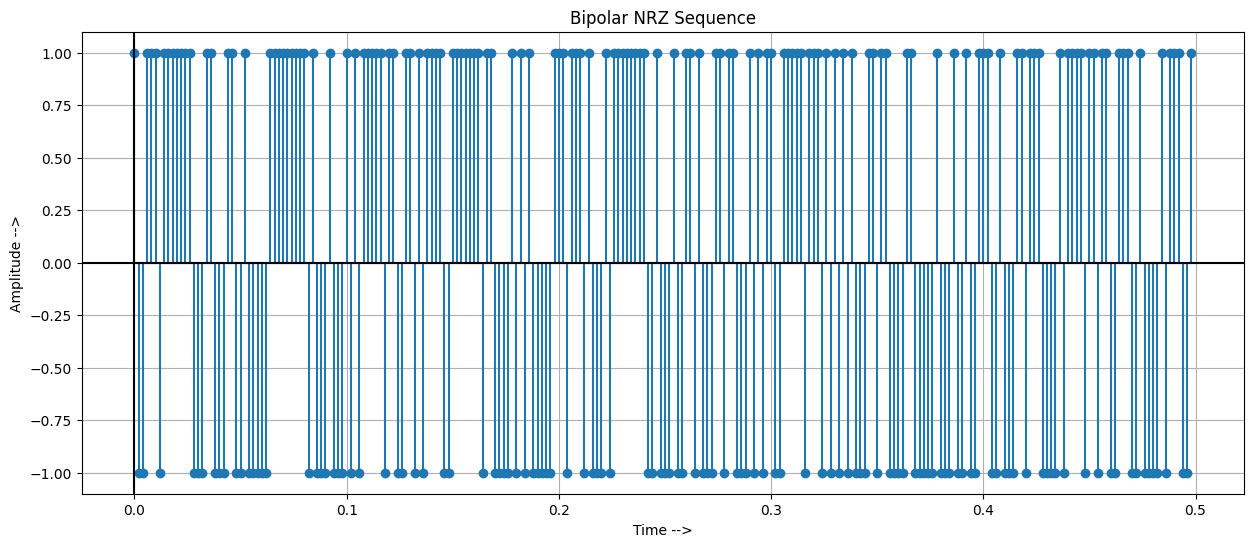

In [324]:
# Generation of bipolar NRZ sequence
bits = np.random.randint(0 , 2, size= len(t)) * 2- 1 # For generating binary sequence {-1 , 1}

#Plotting of the Bipolar NRZ sequence
plt.figure(figsize= (15, 6))
plt.stem(t, bits)
plt.title('Bipolar NRZ Sequence')
plt.xlabel('Time -->')
plt.ylabel('Amplitude -->')
plt.axhline(y = 0, color = 'black')
plt.axvline(x = 0, color = 'black')
plt.grid(True)

In [325]:
X_sin_enc = X_filtered * bits       # Encoding the sinusoidal signal
X_tri_enc = Xt_filtered * bits      # Encoding Triangular signal

# The following code generates a TDM signal
TDM = []   #List for storing TDM signal
for i in range(len(t)):
    TDM.append(X_sin_enc[i])
    TDM.append(X_tri_enc[i])
    TDM.append(bits[i])

In [326]:
Variance = 0.001           #Variance
Rec_sig = []
noise = list(np.random.normal(0, np.sqrt(Variance), len(TDM)))  #AWGN noise generation
Rec_sig = [TDM[i] + noise[i] for i in range(len(TDM))]   #Adding noise to signal

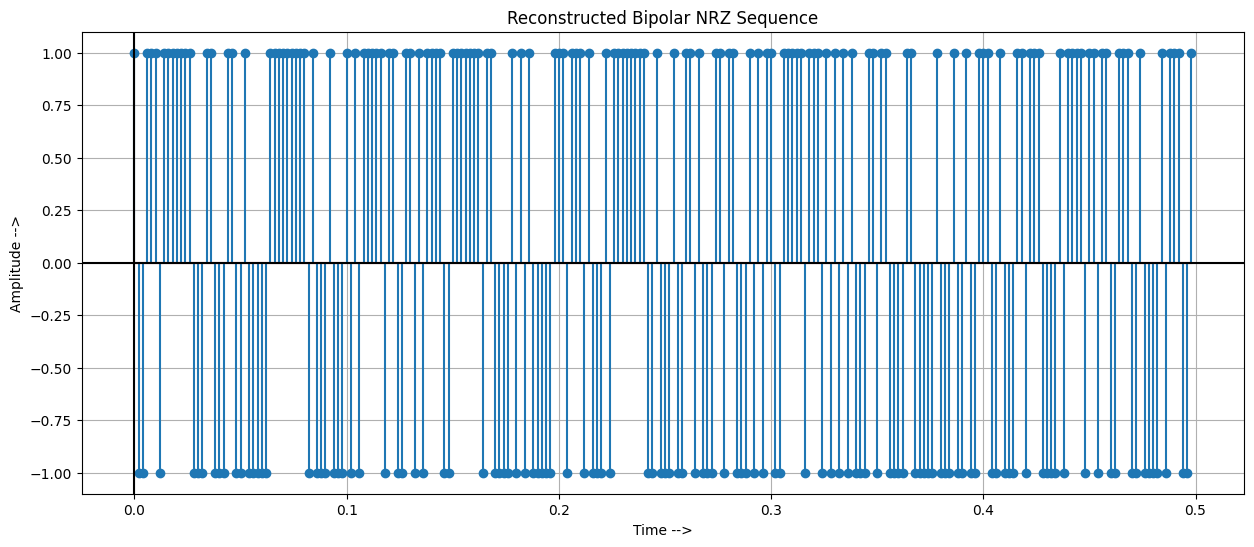

In [327]:
x_sin_rec = [] #Received sine signal
x_tri_rec = [] #Received Triangular signal
bits_rec = []  #Received bits signal

#Demultiplexing of teh received signal
i = 2
while i < 3 * len(t):
    x_sin_rec.append(Rec_sig[i-2])
    x_tri_rec.append(Rec_sig[i - 1])
    bits_rec.append(Rec_sig[i])
    i += 3

#Reconstructing Bipolar NRZ signal
reg_bits = []
for i in range(len(t)):
    if bits_rec[i] >= 0:
        reg_bits.append(1)
    else:
        reg_bits.append(-1)

#Plotting of the Bipolar NRZ sequence
plt.figure(figsize= (15, 6))
plt.stem(t, reg_bits)
plt.title('Reconstructed Bipolar NRZ Sequence')
plt.xlabel('Time -->')
plt.ylabel('Amplitude -->')
plt.axhline(y = 0, color = 'black')
plt.axvline(x = 0, color = 'black')
plt.grid(True)

In [328]:
x_sin_dec = [x_sin_rec[i] * reg_bits[i] for i in range(len(t))]   #Decoded Sine signal
x_tri_dec = [x_tri_rec[i] * reg_bits[i] for i in range(len(t))]   #Decoded Triangular Signal

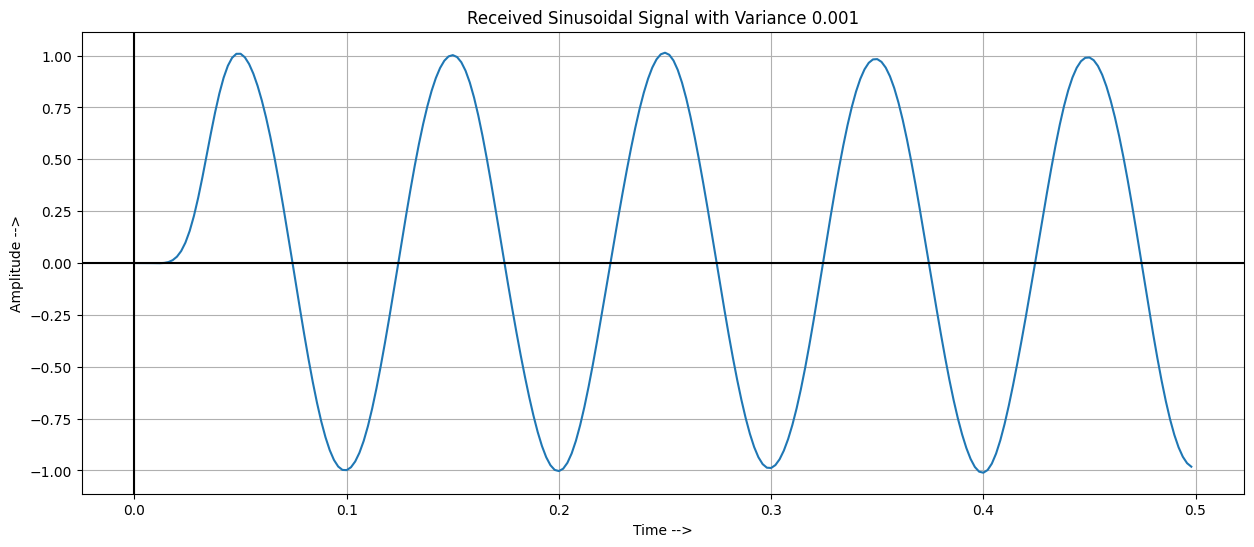

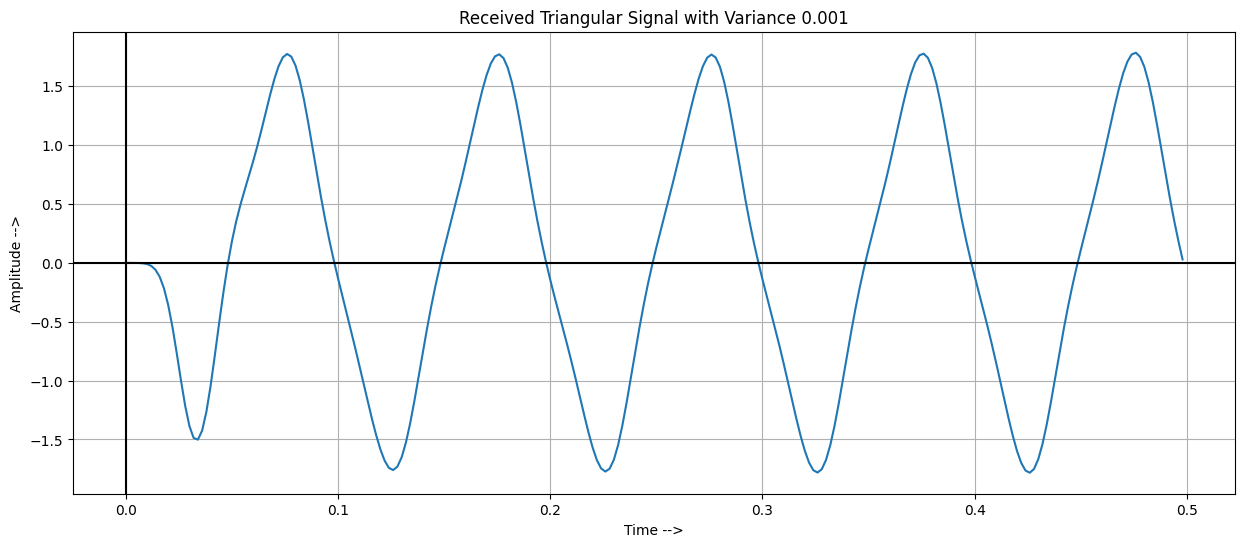

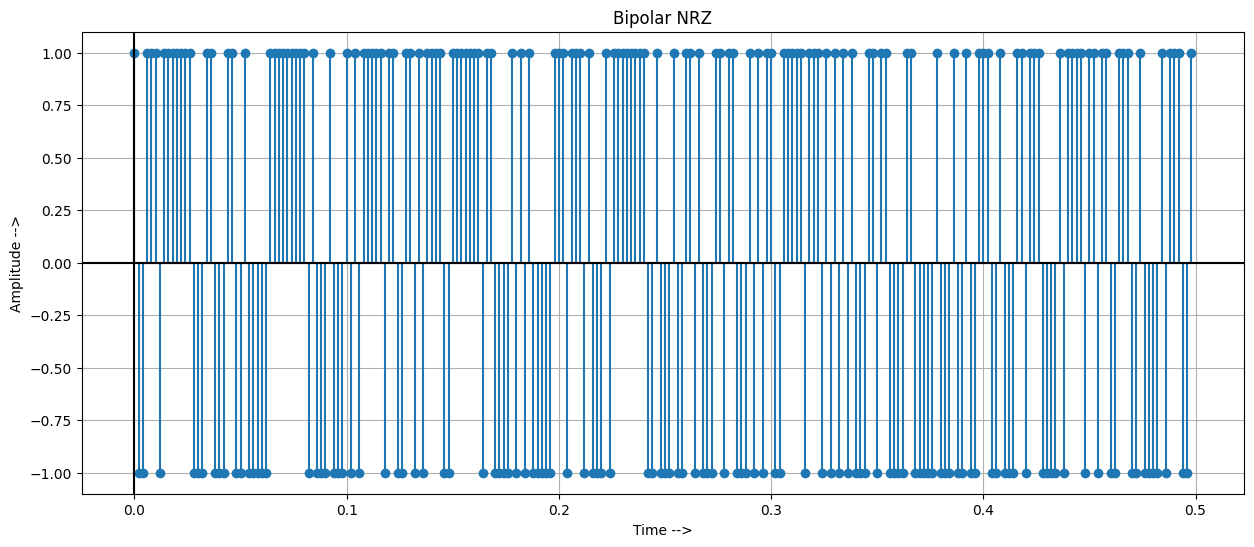

In [329]:
Fc =  fs        # Cutoff frequency of the Anti-aliasing filter
Filter_order = 5   # Order of the filter
fsam = 7000        # Sampling frequency for the filter

NY_freq = 0.5 * fsam
normalized_cutoff_freq = Fc / NY_freq #Normalised Frequency
d, c = signal.butter(Filter_order, normalized_cutoff_freq, btype='low', analog=False)  #Parameters for butter worth filter
X_fil_sin = signal.lfilter(d, c, x_sin_dec) #Filtered Sinusoidal Signal
X_fil_tri = signal.lfilter(d, c, x_tri_dec) #Filtered Sinusoidal Signal

plt.figure(figsize=(15,6))
plt.plot(t,X_fil_sin)
plt.title(f'Received Sinusoidal Signal with Variance {Variance}')
plt.xlabel('Time -->')
plt.ylabel('Amplitude -->')
plt.axhline( y = 0, color = 'black')
plt.axvline( x= 0, color = 'black')
plt.grid(True)

plt.figure(figsize=(15,6))
plt.plot(t,X_fil_tri)
plt.title(f'Received Triangular Signal with Variance {Variance}')
plt.xlabel('Time -->')
plt.ylabel('Amplitude -->')
plt.axhline( y = 0, color = 'black')
plt.axvline( x= 0, color = 'black')
plt.grid(True)

plt.figure(figsize=(15,6))
plt.stem(t,reg_bits)
plt.title('Bipolar NRZ')
plt.xlabel('Time -->')
plt.ylabel('Amplitude -->')
plt.axhline( y = 0, color = 'black')
plt.axvline( x= 0, color = 'black')
plt.grid(True)